**Import Repositories**

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pickle



**Read the data set**

In [64]:
# Load csv dataset
df = pd.read_csv("/content/ADHD.csv", encoding='ISO-8859-1')

# **Data Understanding**

### Basic Overview of the dataset

In [65]:
df.head()

,age,sex,specify,home_language,have_you_ever_experienced_any_mental_health_difficulties_or_symptoms_before_starting_university_e_g_in_primary_or_high_school,if_yes_please_list_these_difficulties_and_or_symptoms,if_you_have_ever_experienced_difficulties_and_or_symptoms_of_a_mental_illness_how_old_were_you_when_this_started,have_you_ever_been_diagnosed_with_a_mental_illness,if_you_have_been_diagnosed_formally_or_informally_please_list_the_diagnosis_diagnoses,was_this_diagnosis_made_before_or_after_you_left_high_school,if_you_have_been_diagnosed_with_a_mental_illness_at_what_age_was_this,have_you_ever_used_prescribed_psychiatric_medication_for_a_mental_illness_or_symptoms_of_one,are_you_currently_using_prescribed_psychiatric_medication_for_a_mental_illness_or_symptoms_of_one,have_you_ever_been_to_therapy_or_counselling_for_a_mental_illness_or_symptoms_of_one,are_you_currently_in_therapy_or_counselling_for_a_mental_illness_or_symptoms_of_one,bdi1_item_1,bdi1_item_2,bdi1_item_3,bdi1_item_4,bdi1_item_5,bdi1_item_6,bdi1_item_7,bdi1_item_8,bdi1_item_9,bdi1_item_10,bdi1_item_11,bdi1_item_12,bdi1_item_13,bdi1_item_14,bdi1_item_15,bdi1_item_16,bdi1_item_17,bdi1_item_18,bdi1_item_19,bdi1_item_20,bdi1_item_21,bdi1_total,audit1_item_1,audit1_item_2,audit1_item_3,audit1_item_4,audit1_item_5,audit1_item_6,audit1_item_7,audit1_item_8,audit1_item_9,audit1_total,aas1_item_1,aas1_item_2,aas1_item_3,aas1_item_4,aas1_item_5,aas1_item_6,aas1_item_7,aas1_item_8,aas1_item_9,aas1_total,psy1004_grade,nbt_completed,nbt_year,nbt_al,nbt_math,nbt_ql,nbt_ave,nbt_did_math,nbt_alql_ave,matric_mark,asrs1_item_1,asrs1_item_2,asrs1_item_3,asrs1_item_4,asrs1_item_5,asrs1_item_6,asrs1_item_7,asrs1_item_8,asrs1_item_9,asrs1_item_10,asrs1_item_11,asrs1_item_12,asrs1_item_13,asrs1_item_14,asrs1_item_15,asrs1_item_16,asrs1_item_17,asrs1_item_18,asrs1_total.x,bai1_item_1,bai1_item_2,bai1_item_3,bai1_item_4,bai1_item_5,bai1_item_6,bai1_item_7,bai1_item_8,bai1_item_9,bai1_item_10,bai1_item_11,bai1_item_12,bai1_item_13,bai1_item_14,bai1_item_15,bai1_item_16,bai1_item_17,bai1_item_18,bai1_item_19,bai1_item_20,bai1_item_21,bai1_total,asrs1_total.y,aas_change,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114
0,22,female,NaN,xitsonga,no,na,na,no,na,not applicable,na,not applicable,not applicable,not applicable,not applicable,3,0,0,1,2,3,1,2,0,1,0,3,0,0,2,1,0,3,0,2,0,24,0,0,0,0,0,0,0,0,0,0,2.0,4.0,5.0,2.0,3.0,1.0,5.0,5,5.0,32,65,yes,2022,57,67,44,56,yes,50.5,84,1,1,1,2,0,0,1,3,2,1,3,0,2,0,1,0,0,1,19,2,3,1,3,3,3,3,3,3,3,1,1,1,3,0,0,3,1,3,1,3,44,44.0,-0.112652,NaN,NaN,NaN,NaN,NaN
1,21,male,NaN,english,no,none,none,no,none,not applicable,none,not applicable,not applicable,not applicable,not applicable,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,5,2,1,1,0,0,0,0,0,0,4,5.0,1.0,2.0,4.0,4.0,4.0,5.0,5,5.0,35,67,yes,2022,82,0,64,73,no,73.0,66,2,2,1,3,3,3,3,2,1,1,1,0,2,1,1,1,2,2,31,0,2,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,6,6.0,NaN,NaN,NaN,NaN,NaN,NaN
2,19,female,NaN,isizulu,yes,mental breakdowns. anxiety. panic attacks,15,not formally diagnosed,adhd,before,14,yes,no,no,no,1,0,1,1,0,0,0,1,0,3,3,1,1,1,1,1,1,1,2,1,0,20,1,0,0,0,0,2,3,4,4,14,4.0,1.0,5.0,1.0,1.0,3.0,5.0,5,5.0,30,56,yes,2022,58,0,41,50,no,49.5,69,2,3,2,1,2,3,3,3,3,4,4,4,4,2,4,4,3,1,52,1,3,1,3,3,2,1,1,3,2,1,2,0,3,0,0,1,0,0,0,2,28,29.0,NaN,NaN,NaN,NaN,NaN,NaN
3,20,male,NaN,afrikaans/english,yes,"depression and anxiety, as well as adhd",16,"yes, formally diagnosed by a doctor or mental ...",depression and adhd,after,18,yes,yes,yes,yes,0,1,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,2,0,0,1,10,3,1,3,1,0,1,1,4,0,14,4.0,1.0,5.0,3.0,1.0,3.0,3.0,3,1.0,24,76,yes,2022,87,0,89,88,NaN,88.0,80,2,2,1,3,4,3,3,3,3,1,3,0,4,3,1,2,2,1,41,0,3,2,3,2,0,2,0,0,2,0,1,0,0,1,2,1,1,0,1,2,23,23.0,-2.244203,NaN,NaN,NaN,NaN,NaN
4,20,female,NaN,isixhosa,no,none,none,no,NaN,not applicable,NaN,no,no,no,no,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,2,1,0,7,0,0,0,0,0,0,0,0,0,0,3.0,1.0,2.0,1.0,4.0,4.0,5.0,5,5.0,30,59,yes,2022,55,92,56,68,yes,55.5,77,1,1,1,2,0,2,3,1,0,3,3

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Columns: 115 entries, age to Unnamed: 114
dtypes: float64(16), int64(83), object(16)
memory usage: 454.7+ KB


In [67]:
df.dtypes

,0
age,int64
sex,object
specify,object
home_language,object
have_you_ever_experienced_any_mental_health_difficulties_or_symptoms_before_starting_university_e_g_in_primary_or_high_school,object
...,...
Unnamed: 110,float64
Unnamed: 111,float64
Unnamed: 112,float64
Unnamed: 113,float64


In [68]:
df.shape

(506, 115)

In [69]:
# check for null data columns
df.isnull().sum()

,0
age,0
sex,0
specify,495
home_language,0
have_you_ever_experienced_any_mental_health_difficulties_or_symptoms_before_starting_university_e_g_in_primary_or_high_school,0
...,...
Unnamed: 110,506
Unnamed: 111,506
Unnamed: 112,506
Unnamed: 113,506


In [70]:
print(df.columns.tolist())


['age', 'sex', 'specify', 'home_language', 'have_you_ever_experienced_any_mental_health_difficulties_or_symptoms_before_starting_university_e_g_in_primary_or_high_school', 'if_yes_please_list_these_difficulties_and_or_symptoms', 'if_you_have_ever_experienced_difficulties_and_or_symptoms_of_a_mental_illness_how_old_were_you_when_this_started', 'have_you_ever_been_diagnosed_with_a_mental_illness', 'if_you_have_been_diagnosed_formally_or_informally_please_list_the_diagnosis_diagnoses', 'was_this_diagnosis_made_before_or_after_you_left_high_school', 'if_you_have_been_diagnosed_with_a_mental_illness_at_what_age_was_this', 'have_you_ever_used_prescribed_psychiatric_medication_for_a_mental_illness_or_symptoms_of_one', 'are_you_currently_using_prescribed_psychiatric_medication_for_a_mental_illness_or_symptoms_of_one', 'have_you_ever_been_to_therapy_or_counselling_for_a_mental_illness_or_symptoms_of_one', 'are_you_currently_in_therapy_or_counselling_for_a_mental_illness_or_symptoms_of_one', 'bd

In [71]:
# drop unwanted columns
df = df.drop(['specify', 'home_language', 'if_yes_please_list_these_difficulties_and_or_symptoms', 'have_you_ever_been_diagnosed_with_a_mental_illness', 'if_you_have_ever_experienced_difficulties_and_or_symptoms_of_a_mental_illness_how_old_were_you_when_this_started', 'if_you_have_been_diagnosed_formally_or_informally_please_list_the_diagnosis_diagnoses', 'was_this_diagnosis_made_before_or_after_you_left_high_school', 'if_you_have_been_diagnosed_with_a_mental_illness_at_what_age_was_this', 'have_you_ever_used_prescribed_psychiatric_medication_for_a_mental_illness_or_symptoms_of_one', 'are_you_currently_using_prescribed_psychiatric_medication_for_a_mental_illness_or_symptoms_of_one', 'have_you_ever_been_to_therapy_or_counselling_for_a_mental_illness_or_symptoms_of_one', 'are_you_currently_in_therapy_or_counselling_for_a_mental_illness_or_symptoms_of_one', 'bdi1_item_1', 'bdi1_item_2', 'bdi1_item_3', 'bdi1_item_4', 'bdi1_item_5', 'bdi1_item_6', 'bdi1_item_7', 'bdi1_item_8', 'bdi1_item_9', 'bdi1_item_10', 'bdi1_item_11', 'bdi1_item_12', 'bdi1_item_13', 'bdi1_item_14', 'bdi1_item_15', 'bdi1_item_16', 'bdi1_item_17', 'bdi1_item_18', 'bdi1_item_19', 'bdi1_item_20', 'bdi1_item_21', 'audit1_item_1', 'audit1_item_2', 'audit1_item_3', 'audit1_item_4', 'audit1_item_5', 'audit1_item_6', 'audit1_item_7', 'audit1_item_8', 'audit1_item_9', 'aas1_item_1', 'aas1_item_2', 'aas1_item_3', 'aas1_item_4', 'aas1_item_5', 'aas1_item_6', 'aas1_item_7', 'aas1_item_8', 'aas1_item_9', 'nbt_completed', 'nbt_year', 'nbt_al', 'nbt_math', 'nbt_ql', 'nbt_ave', 'nbt_did_math', 'nbt_alql_ave', 'asrs1_item_1', 'asrs1_item_2', 'asrs1_item_3', 'asrs1_item_4', 'asrs1_item_5', 'asrs1_item_6', 'asrs1_item_7', 'asrs1_item_8', 'asrs1_item_9', 'asrs1_item_10', 'asrs1_item_11', 'asrs1_item_12', 'asrs1_item_13', 'asrs1_item_14', 'asrs1_item_15', 'asrs1_item_16', 'asrs1_item_17', 'asrs1_item_18', 'bai1_item_1', 'bai1_item_2', 'bai1_item_3', 'bai1_item_4', 'bai1_item_5', 'bai1_item_6', 'bai1_item_7', 'bai1_item_8', 'bai1_item_9', 'bai1_item_10', 'bai1_item_11', 'bai1_item_12', 'bai1_item_13', 'bai1_item_14', 'bai1_item_15', 'bai1_item_16', 'bai1_item_17', 'bai1_item_18', 'bai1_item_19', 'bai1_item_20', 'bai1_item_21', 'asrs1_total.y', 'Unnamed: 110', 'Unnamed: 111', 'Unnamed: 112', 'Unnamed: 113', 'Unnamed: 114'],axis=1)

In [72]:
# Print columns after dropping
print("Columns after dropping:")
print(df.columns.tolist())

Columns after dropping:
['age', 'sex', 'have_you_ever_experienced_any_mental_health_difficulties_or_symptoms_before_starting_university_e_g_in_primary_or_high_school', 'bdi1_total', 'audit1_total', 'aas1_total', 'psy1004_grade', 'matric_mark', 'asrs1_total.x', 'bai1_total', 'aas_change']


In [73]:
df.head()

,age,sex,have_you_ever_experienced_any_mental_health_difficulties_or_symptoms_before_starting_university_e_g_in_primary_or_high_school,bdi1_total,audit1_total,aas1_total,psy1004_grade,matric_mark,asrs1_total.x,bai1_total,aas_change
0,22,female,no,24,0,32,65,84,19,44,-0.112652
1,21,male,no,5,4,35,67,66,31,6,NaN
2,19,female,yes,20,14,30,56,69,52,28,NaN
3,20,male,yes,10,14,24,76,80,41,23,-2.244203
4,20,female,no,7,0,30,59,77,27,12,NaN


In [74]:
# Rename columns in the DataFrame
df.rename(columns={
    'have_you_ever_experienced_any_mental_health_difficulties_or_symptoms_before_starting_university_e_g_in_primary_or_high_school': 'Previous_state',
    #'have_you_ever_been_diagnosed_with_a_mental_illness': 'mental_illness_status',
    'bdi1_total': 'depression_Total',
    'audit1_total': 'Alcohol_total',
    'psy1004_grade': 'University_Performance',
    'matric_mark': 'HighSchool_performance',
    'asrs1_total.x': 'adhd_total',
    'bai1_total': 'Anexity_total'
}, inplace=True)

# Display the updated DataFrame to verify changes
df.head()


,age,sex,Previous_state,depression_Total,Alcohol_total,aas1_total,University_Performance,HighSchool_performance,adhd_total,Anexity_total,aas_change
0,22,female,no,24,0,32,65,84,19,44,-0.112652
1,21,male,no,5,4,35,67,66,31,6,NaN
2,19,female,yes,20,14,30,56,69,52,28,NaN
3,20,male,yes,10,14,24,76,80,41,23,-2.244203
4,20,female,no,7,0,30,59,77,27,12,NaN


In [75]:
print(df.columns.tolist())

['age', 'sex', 'Previous_state', 'depression_Total', 'Alcohol_total', 'aas1_total', 'University_Performance', 'HighSchool_performance', 'adhd_total', 'Anexity_total', 'aas_change']


# **Data Processing**

### Descriptive Analysis


In [76]:
df.describe()

,age,depression_Total,Alcohol_total,aas1_total,University_Performance,HighSchool_performance,adhd_total,Anexity_total,aas_change
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,176.000000
mean,18.428854,16.312253,3.802372,31.000000,60.519763,74.316206,35.669960,21.209486,-0.019397
std,0.720202,10.308572,4.819564,4.880756,11.200451,6.359745,11.509435,12.758829,2.260037
min,18.000000,0.000000,0.000000,9.000000,28.000000,58.000000,0.000000,0.000000,-6.080996
25%,18.000000,9.000000,0.000000,28.000000,52.000000,69.000000,27.250000,11.000000,-1.604738
50%,18.000000,15.000000,2.000000,31.000000,61.000000,74.000000,35.000000,20.000000,0.100503
75%,19.000000,23.000000,6.000000,34.000000,69.000000,79.000000,43.750000,30.000000,1.805744
max,22.000000,58.000000,28.000000,45.000000,88.000000,92.000000,70.000000,62.000000,5.003071


**Label Encoding**


In [77]:
# Identify categorical columns
categorical_columns = ['sex', 'Previous_state']  # Replace with your categorical column names

# Display unique values in each categorical column
for col in categorical_columns:
    print(f'{col} unique values:', df[col].unique())

sex unique values: ['female' 'male' 'other']
Previous_state unique values: ['no' 'yes']


In [78]:
# Initialize label encoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Verify the transformation
print(df.head())


   age  sex  Previous_state  depression_Total  Alcohol_total  aas1_total  \
0   22    0               0                24              0          32   
1   21    1               0                 5              4          35   
2   19    0               1                20             14          30   
3   20    1               1                10             14          24   
4   20    0               0                 7              0          30   

   University_Performance  HighSchool_performance  adhd_total  Anexity_total  \
0                      65                      84          19             44   
1                      67                      66          31              6   
2                      56                      69          52             28   
3                      76                      80          41             23   
4                      59                      77          27             12   

   aas_change  
0   -0.112652  
1         NaN  
2         NaN 

### Data Cleaning

In [79]:
# check for null data columns

pd.set_option('display.max_columns', None)

# Check for null values
print(df.isnull().sum())


age                         0
sex                         0
Previous_state              0
depression_Total            0
Alcohol_total               0
aas1_total                  0
University_Performance      0
HighSchool_performance      0
adhd_total                  0
Anexity_total               0
aas_change                330
dtype: int64


In [80]:
# Summary statistics of the 'aas_change' feature
print(df['aas_change'].describe())

# Count the number of missing values
print(f"Missing values in aas_change: {df['aas_change'].isnull().sum()}")


count    176.000000
mean      -0.019397
std        2.260037
min       -6.080996
25%       -1.604738
50%        0.100503
75%        1.805744
max        5.003071
Name: aas_change, dtype: float64
Missing values in aas_change: 330


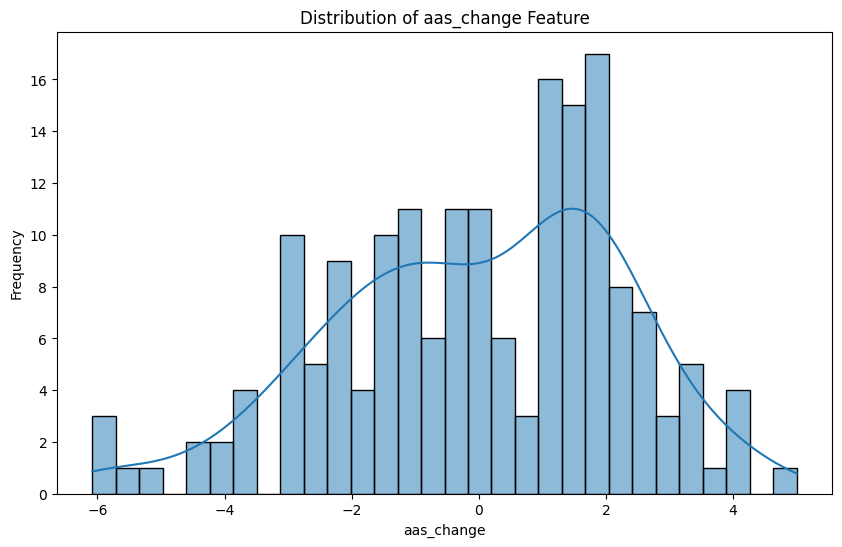

In [81]:
plt.figure(figsize=(10,6))
sns.histplot(df['aas_change'].dropna(), kde=True, bins=30)
plt.title('Distribution of aas_change Feature')
plt.xlabel('aas_change')
plt.ylabel('Frequency')
plt.show()


In [82]:
# Handle missing values in the aas_change column by calculating statistical measures (mean, median, and mode)

mean_value = df['aas_change'].mean()
median_value = df['aas_change'].median()
mode_value = df['aas_change'].mode()[0]

print(f"Mean: {mean_value}, Median: {median_value}, Mode: {mode_value}")

# Based on distribution, decide the best method
# Assuming median is chosen due to potential skewness or outliers:

df['aas_change'].fillna(median_value, inplace=True)


Mean: -0.01939656521590908, Median: 0.100503199, Mode: 1.80574429


<ipython-input-82-692c201a025b>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['aas_change'].fillna(median_value, inplace=True)


Remaining missing values in aas_change: 0


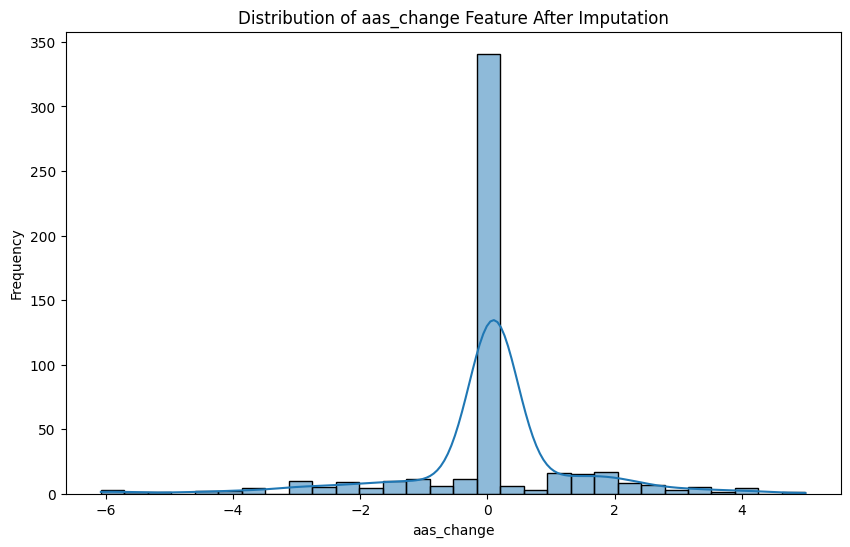

In [83]:
# Check if there are any remaining missing values
print(f"Remaining missing values in aas_change: {df['aas_change'].isnull().sum()}")

# Re-check the distribution after **imputation**
plt.figure(figsize=(10,6))
sns.histplot(df['aas_change'], kde=True, bins=30)
plt.title('Distribution of aas_change Feature After Imputation')
plt.xlabel('aas_change')
plt.ylabel('Frequency')
plt.show()


# **Data Visualization**

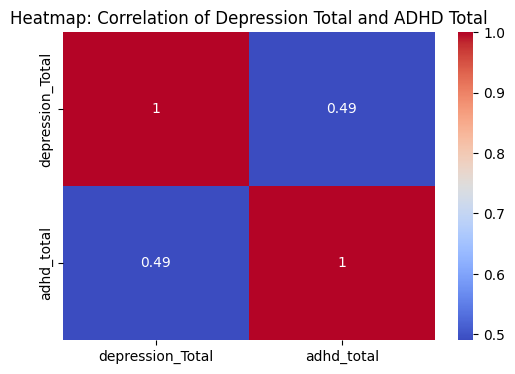

In [84]:
#Heatmap: Correlation of depression_Total with target and other variables

corr_matrix = df[['depression_Total', 'adhd_total']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Heatmap: Correlation of Depression Total and ADHD Total')
plt.show()

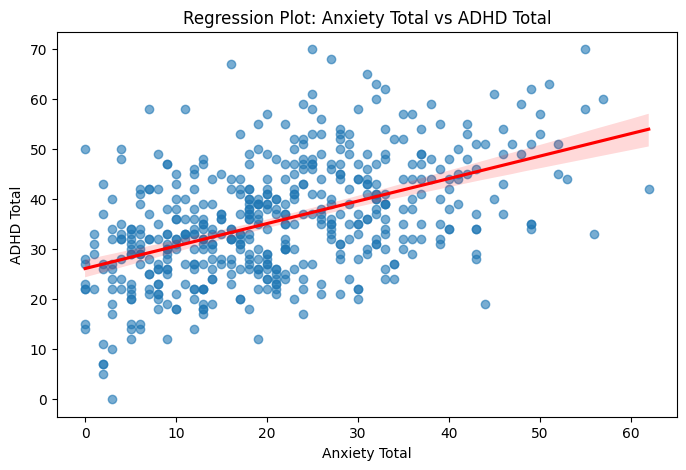

In [85]:
#Regression Plot: Anexity_total vs adhd_total

plt.figure(figsize=(8, 5))
sns.regplot(data=df, x='Anexity_total', y='adhd_total', scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('Regression Plot: Anxiety Total vs ADHD Total')
plt.xlabel('Anxiety Total')
plt.ylabel('ADHD Total')
plt.show()

<ipython-input-86-52e925b8f9c9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Previous_state', y='adhd_total', palette='pastel')


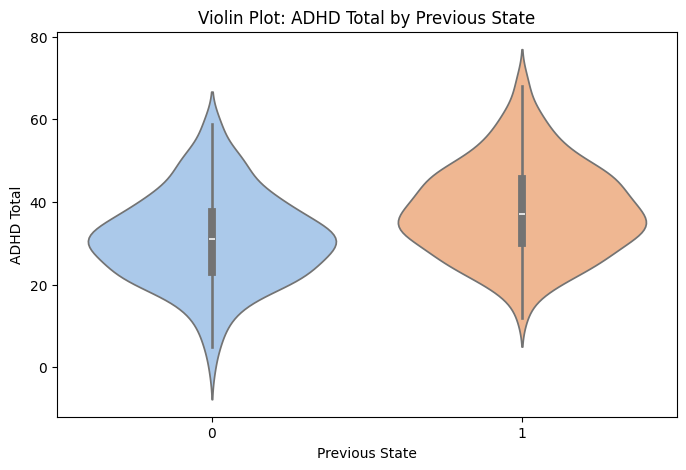

In [86]:
#Violin Plot: Previous_state vs adhd_total - distribution of ADHD Total scores for a specific Previous_state category.
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='Previous_state', y='adhd_total', palette='pastel')
plt.title('Violin Plot: ADHD Total by Previous State')
plt.xlabel('Previous State')
plt.ylabel('ADHD Total')
plt.show()

#A violin plot combines a *box plot and a *kernel density estimate (KDE). It shows:
#The distribution (shape) of adhd_total scores for each category of Previous_state.
#The median and interquartile range (from the box plot inside the violin).

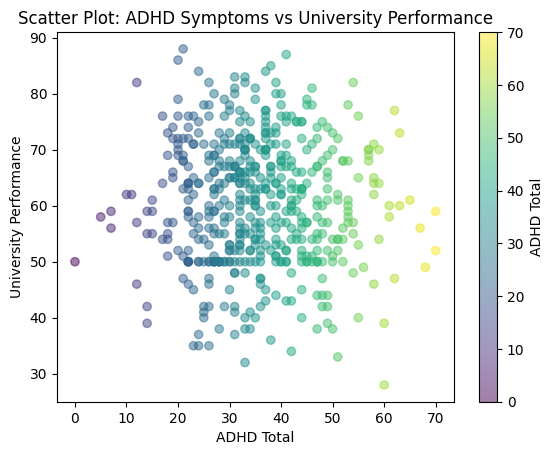

In [87]:
plt.scatter(df['adhd_total'], df['University_Performance'], c=df['adhd_total'], cmap='viridis', alpha=0.5)
plt.title('Scatter Plot: ADHD Symptoms vs University Performance')
plt.xlabel('ADHD Total')
plt.ylabel('University Performance')
plt.colorbar(label='ADHD Total')  # Add a color bar to show the range
plt.show()

#A scatter plot displays individual data points as dots on a 2D graph, helping visualize the relationship between two variables.

#Data Mining



In [88]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)


                             age       sex  Previous_state  depression_Total  \
age                     1.000000  0.162463       -0.024330         -0.038343   
sex                     0.162463  1.000000       -0.062144         -0.004539   
Previous_state         -0.024330 -0.062144        1.000000          0.363586   
depression_Total       -0.038343 -0.004539        0.363586          1.000000   
Alcohol_total           0.035875  0.158202        0.161927          0.107224   
aas1_total              0.139144 -0.004444       -0.019497         -0.239370   
University_Performance  0.073696 -0.113325        0.031413         -0.157426   
HighSchool_performance -0.004590 -0.043795       -0.000260         -0.152833   
adhd_total             -0.041180  0.082419        0.288635          0.490354   
Anexity_total           0.007875 -0.086025        0.402591          0.661001   
aas_change              0.036290  0.023988       -0.025181         -0.185843   

                        Alcohol_total  

In [89]:
# Extract correlations with 'adhd_total'
adhd_correlation = correlation_matrix['adhd_total'].sort_values(ascending=False)

# Display the correlations
print(adhd_correlation)

# 1 - positive correlation (as one variable increases, the other increases).
# -1 -  negative correlation (as one variable increases, the other decreases).
# 0 - no linear correlation (no predictable relationship).

adhd_total                1.000000
Anexity_total             0.498303
depression_Total          0.490354
Previous_state            0.288635
Alcohol_total             0.171958
sex                       0.082419
HighSchool_performance   -0.020268
University_Performance   -0.040740
age                      -0.041180
aas_change               -0.119238
aas1_total               -0.145480
Name: adhd_total, dtype: float64


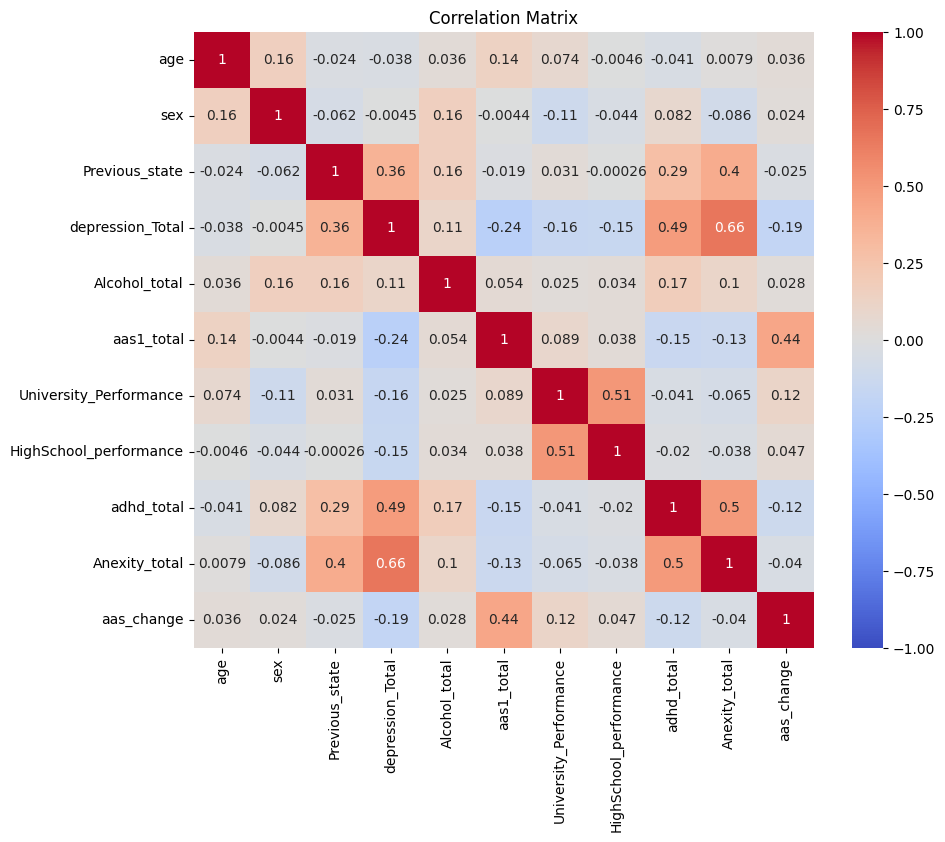

In [90]:
plt.figure(figsize=(10, 8))

# Create a heatmap for the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Correlation Matrix')
plt.show()


<ipython-input-91-a7029289aa8a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=adhd_correlation.index, y=adhd_correlation.values, palette='coolwarm')


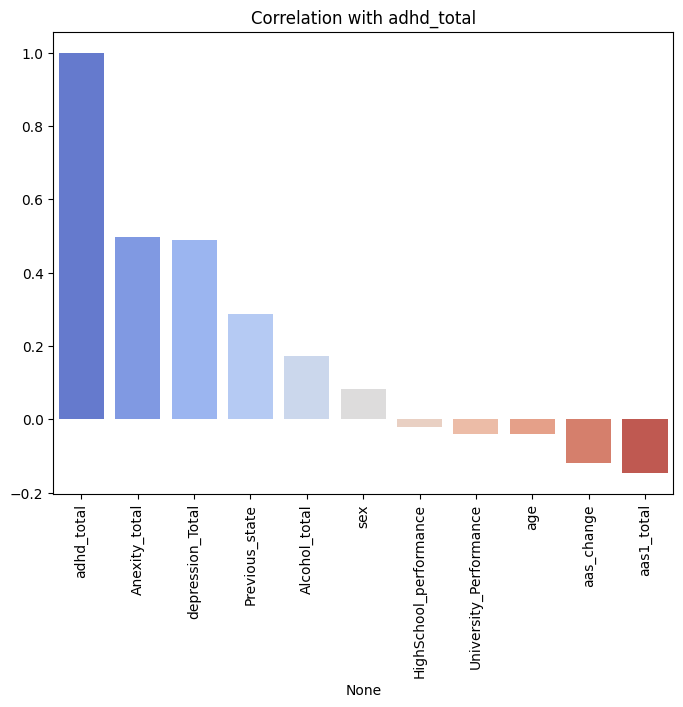

In [91]:
plt.figure(figsize=(8, 6))

#bar plot that visualizes the correlation values between the adhd_total variable and all other numerical variables
sns.barplot(x=adhd_correlation.index, y=adhd_correlation.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Correlation with adhd_total')
plt.show()


In [92]:
# Define Classes: Create a new column in the dataset to classify adhd_total into categories
def classify_adhd(score):
    if score <= 16:
        return 'Unlikely'
    elif 17 <= score <= 24:
        return 'Likely'
    else:
        return 'Highly Likely'

# Apply the classification function
df['adhd_category'] = df['adhd_total'].apply(classify_adhd)

# Encode Categories: Map the categories to numeric labels
category_mapping = {'Unlikely': 0, 'Likely': 1, 'Highly Likely': 2}
df['adhd_category_encoded'] = df['adhd_category'].map(category_mapping)

# Define features and target (keep adhd_total for final correction)
X = df.drop(columns=['adhd_total', 'adhd_category', 'adhd_category_encoded'])
y = df['adhd_category_encoded']



Check if the Dataset is Imbalanced

adhd_category_encoded
2    421
1     69
0     16
Name: count, dtype: int64


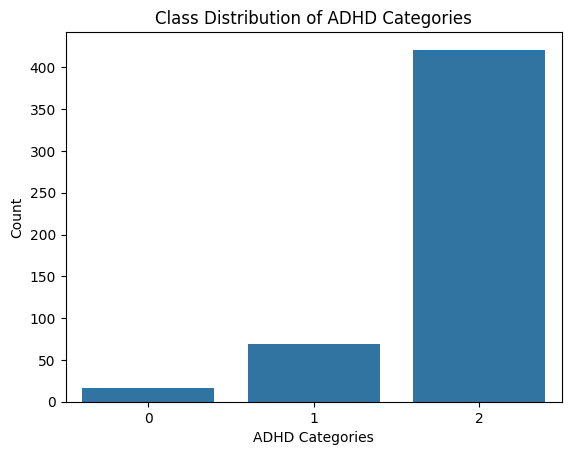

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check class distribution
class_distribution = df['adhd_category_encoded'].value_counts()
print(class_distribution)

# Plot class distribution
sns.countplot(x='adhd_category_encoded', data=df)
plt.title('Class Distribution of ADHD Categories')
plt.xlabel('ADHD Categories')
plt.ylabel('Count')
plt.show()


Handle Class Imbalance

- oversampling technique used to address class imbalance in datasets.

- After applying SMOTE:

  - All classes will have the same number of samples as the majority class (421 in your case).

In [94]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check new class distribution
from collections import Counter
print("Class Distribution After SMOTE:", Counter(y_resampled))




Class Distribution After SMOTE: Counter({1: 421, 2: 421, 0: 421})


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


##Spliting data

In [95]:
from sklearn.model_selection import train_test_split

# Split the resampled dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (1010, 10)
Testing set size: (253, 10)


In [96]:
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()

# Fit on training data and transform both sets
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Model Training and Evaluation**

In [97]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Classifier': SVC(probability=True, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Train and evaluate each model
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

# Convert results to a DataFrame
results_df = pd.DataFrame(results).T
print(results_df)


                           Accuracy  Precision    Recall  F1-Score
Logistic Regression        0.723320   0.721659  0.723320  0.722155
Decision Tree              0.885375   0.885527  0.885375  0.884651
Random Forest              0.901186   0.900671  0.901186  0.900533
Support Vector Classifier  0.810277   0.809338  0.810277  0.808601
Gradient Boosting          0.873518   0.875913  0.873518  0.871880


### Performing Cross-Validation

In [98]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Cross-validation with Random Forest
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(RandomForestClassifier(random_state=42, class_weight='balanced'),
                            X_train, y_train, cv=cv, scoring='accuracy')

print("Cross-Validation Mean Accuracy:", np.mean(cv_scores))
print("Cross-Validation Standard Deviation:", np.std(cv_scores))


Cross-Validation Mean Accuracy: 0.9009900990099009
Cross-Validation Standard Deviation: 0.03328264616628041


In [99]:
# Identify and print the best model based on F1-Score
best_model_name = results_df['F1-Score'].idxmax()

# Print the best model and its F1-Score
best_model_f1_score = results_df.loc[best_model_name, 'F1-Score']
print(f"\nThe best model is: {best_model_name}")
print(f"F1-Score: {best_model_f1_score:.4f}")


The best model is: Random Forest
F1-Score: 0.9005


Hyperparameter Tuning for Random Forest  

In [100]:
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Randomized Search for Random Forest
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_distributions=param_grid,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

# Best Parameters and Model Performance
print("Best Parameters Found:", random_search.best_params_)
best_rf_model = random_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_best)
print("Best Random Forest Accuracy after Tuning:", accuracy)


Best Parameters Found: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': False}
Best Random Forest Accuracy after Tuning: 0.932806324110672


##Evaluate the Tuned Model

Confusion Matrix: This will help you visualize how well the model performs in terms of true positives, true negatives, false positives, and false negatives.



Confusion Matrix:
[[84  0  0]
 [ 0 78  6]
 [ 2  9 74]]


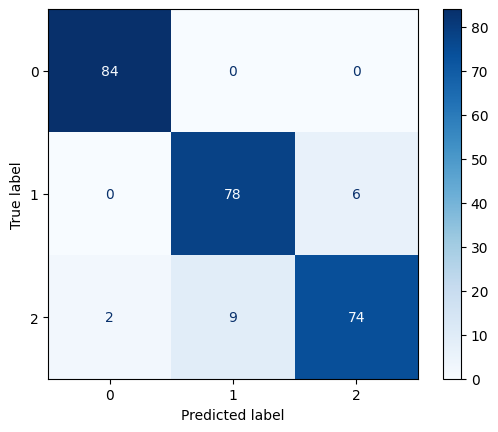

In [101]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_best)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap='Blues')

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

- Class 0 (Unlikely): 84 correct predictions, no misclassifications.
- Class 1 (Likely): 78 correct predictions, 6 misclassified as "Highly Likely."
- Class 2 (Highly Likely): 74 correct predictions, 2 misclassified as "Unlikely" and 9 as "Likely.

##Classification Report:
- It provides precision, recall, f1-score, and support for each class in your classification task.

In [102]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_best))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99        84
           1       0.90      0.93      0.91        84
           2       0.93      0.87      0.90        85

    accuracy                           0.93       253
   macro avg       0.93      0.93      0.93       253
weighted avg       0.93      0.93      0.93       253



ROC Curve & AUC: For binary classification

For Multiclass Classification:
One-vs-Rest (OvR) Approach for ROC: my model appears to be a multiclass classification model. also can compute a separate ROC curve for each class by using a One-vs-Rest strategy. Here's how you can modify the code:

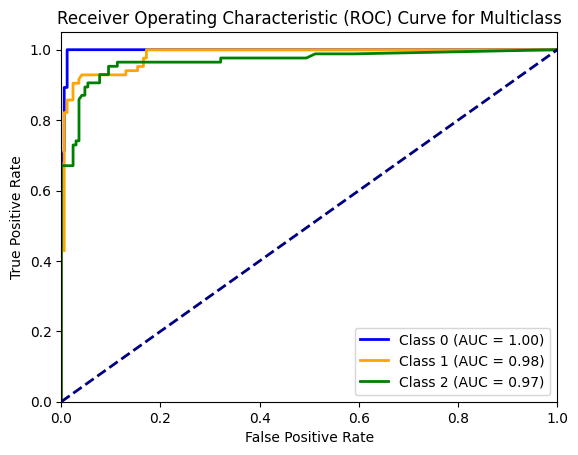

In [103]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the output labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # adjust classes according to your dataset
y_pred_prob = best_rf_model.predict_proba(X_test)

# Compute ROC curve and AUC for each class
n_classes = y_test_bin.shape[1]
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
colors = ['blue', 'orange', 'green']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass')
plt.legend(loc="lower right")
plt.show()


Feature Importance:

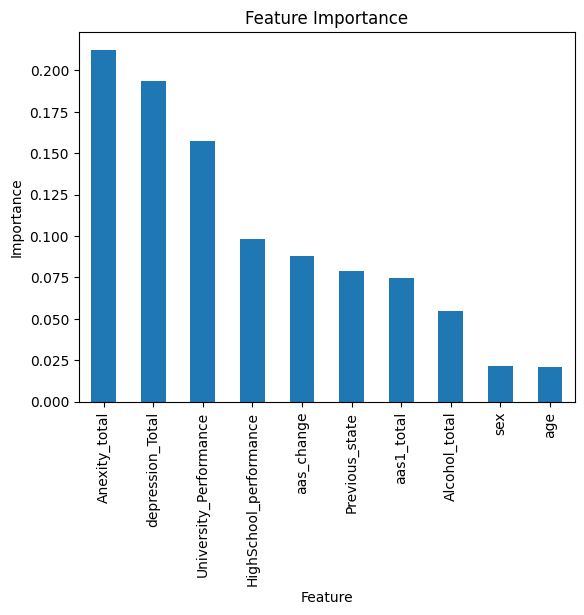

In [104]:
importances = best_rf_model.feature_importances_

# List of feature names based on your dataset
feature_names = ['age', 'sex', 'Previous_state', 'depression_Total',
                 'Alcohol_total', 'aas1_total', 'University_Performance', 'HighSchool_performance', 'Anexity_total', 'aas_change']

# Create a DataFrame to hold the feature names and their corresponding importance scores
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the features by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
feature_importance.plot(kind='bar', x='Feature', y='Importance', legend=False)
plt.title('Feature Importance')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.show()


In [105]:
import pickle

# Ensure the best model is correctly assigned
best_model = best_rf_model  # Use the variable that holds your trained model, e.g., best_rf_model or grid_search.best_estimator_

# Save the trained model
with open("best_random_forest_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print("Model saved as 'best_random_forest_model.pkl'.")

Model saved as 'best_random_forest_model.pkl'.


In [106]:
import pickle

# Save the scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


In [107]:
pip install gradio

In [108]:
import pickle
import gradio as gr
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the trained model and scaler
with open("best_random_forest_model.pkl", "rb") as f:
    best_model = pickle.load(f)

with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

print("Model and scaler loaded successfully")

# Map the numeric predictions to class names
category_mapping = {0: "Unlikely", 1: "Likely", 2: "Highly Likely"}

# Feature columns (must match training feature order)
feature_columns = [
    "age", "sex", "Previous_state", "depression_Total", "Alcohol_total",
    "aas1_total", "University_Performance", "HighSchool_performance",
    "Anexity_total", "aas_change"
]

def predict_adhd_category(age, sex, previous_state, depression_total, alcohol_total,
                          aas1_total, university_performance, high_school_performance, anxiety_total,
                          aas_change):
    try:
        # Prepare input data
        input_data = pd.DataFrame([[age, sex, previous_state, depression_total, alcohol_total,
                                    aas1_total, university_performance, high_school_performance,
                                    anxiety_total, aas_change]], columns=feature_columns)

        # Apply StandardScaler (ensure input matches training scaling)
        input_data_scaled = scaler.transform(input_data)

        # Predict ADHD category
        adhd_category = best_model.predict(input_data_scaled)
        category_name = category_mapping.get(adhd_category[0], "Unknown")  # Map numeric value to category name

        return f"Predicted ADHD Category: {category_name}"

    except Exception as e:
        return f"Error: {e}"

# Create Gradio interface
iface = gr.Interface(
    fn=predict_adhd_category,
    inputs=[
        gr.Number(label="Age"),
        gr.Radio(choices=[0, 1], label="Sex (0=Female, 1=Male)"),
        gr.Radio(choices=[0, 1], label="Previous State (0=No, 1=Yes)"),
        gr.Number(label="Depression Total"),
        gr.Number(label="Alcohol Total"),
        gr.Number(label="AAS1 Total"),
        gr.Number(label="University Performance"),
        gr.Number(label="High School Performance"),
        gr.Number(label="Anxiety Total"),
        gr.Number(label="AAS Change"),
    ],
    outputs="text",
    title="ADHD Category Predictor"
)

# Launch the interface
iface.launch()


Model and scaler loaded successfully
Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ea02328c967083418e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
